In [1]:
%matplotlib ipympl

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# from scipy.ndimage import gaussian_filter

from __future__ import print_function
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from PIL import Image
from tqdm.notebook import trange, tqdm, tnrange
import time
from datetime import datetime

# import math
# import glob
import numpy as np


# import itertools
import os.path
import os
import sys
# from skimage.io import imread
import cv2

# import pandas as pd

# from scipy.signal import savgol_filter
# import pytesseract 
# from scipy.signal import find_peaks

matplotlib.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "arial"


import importlib

import SimpleITK as sitk
# import imageio

In [2]:
## Import functions
PathToFunctions = '/Users/iracicot/Documents/GitHub/HySE_HypercubeFunctions/'
sys.path.append(PathToFunctions)
import HySE


## Indicate which wavelengths were used (Panel4, Panel2), in nm
Wavelengths_list = np.array([475,566,494,590,518,614,542,638, 482,578,506,602,530,626,554,650])


SavingPath = '/Users/iracicot/Library/CloudStorage/OneDrive-UniversityofCambridge/Data/CCRC/20240531/'
## Locate the data to analyse
Name = 'Flat_3x'
WhiteName = 'Flat_White_3x'

CropImDimensions = [166,680, 42,520] ## Dazzle, PoM


DataPath = SavingPath
vidPath = DataPath+Name+'.mpg'
vidPathWhite = DataPath+WhiteName+'.mpg'

ATTENTION: ReturnPeaks is set to True. Be careful, the output will have three elements!
Add 'Help=True' in input for a list and description of all optional parameters 
Max plateau size set to 30
Min long dark size set to 50
Expected plateau size set to 17
Only importing the trace of the data
Cropping Image
Cropping image: x [166 : 680],y [42, 520]
Setting peak height to 0.03
Setting peak distance to 15

[18 21 18 18 18 21 18 18 18 21 18 21 18 21 18 18 18]
  separation: 75 - 17 plateaux, avg 18.88 frames +/- 1.37


[21 18 18 18 21 18 18 18 21 18 18 18 21 18 18 18 21]
  separation: 75 - 17 plateaux, avg 18.88 frames +/- 1.37


[18 18 18 21 18 18 18 21 18 18 18 21 18 18 18 21 18]
  separation: 75 - 17 plateaux, avg 18.71 frames +/- 1.27


[18 18 21 18 18 18 21 18 18 18 21 18 18 18 21 18 18]
  separation: 75 - 17 plateaux, avg 18.71 frames +/- 1.27


[18 21 18 18 18 21 18 18 18 21 18 18 18 21 18 18 18]
  separation: 75 - 17 plateaux, avg 18.71 frames +/- 1.27


[21 18 18 18 24 18 18 18 21 

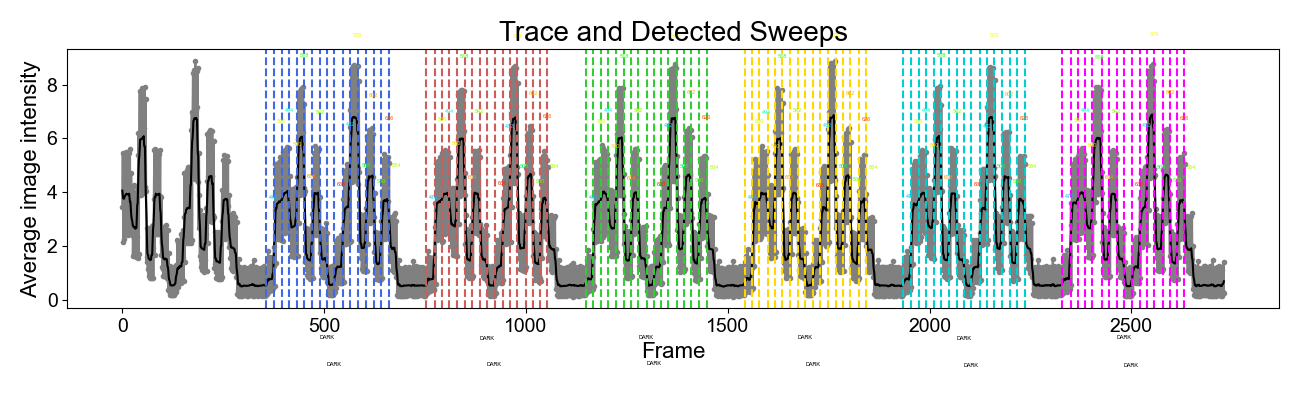

In [3]:
## DATA

EdgePos = HySE.FindHypercube(vidPath, Wavelengths_list, PlotGradient=False, CropImDimensions=CropImDimensions, DarkMin=50, PlateauSize=17, 
                             MaxPlateauSize=30, PeakHeight=0.03, ReturnPeaks=False, PeakDistance=15, WindowLength=6)

ATTENTION: ReturnPeaks is set to True. Be careful, the output will have three elements!
Add 'Help=True' in input for a list and description of all optional parameters 
Max plateau size set to 30
Min long dark size set to 50
Expected plateau size set to 17
Only importing the trace of the data
Cropping Image
Cropping image: x [166 : 680],y [42, 520]
Setting peak height to 0.035
Setting peak distance to 15

[18 18 18 21 18 18 18 21 18 18 18 21 18 18 18 21 18]
  separation: 75 - 17 plateaux, avg 18.71 frames +/- 1.27


[18 18 21 18 18 18 21 18 18 18 21 18 18 18 21 18 18]
  separation: 75 - 17 plateaux, avg 18.71 frames +/- 1.27


[18 21 18 18 18 21 18 18 21 18 18 18 18 21 18 18 18]
  separation: 75 - 17 plateaux, avg 18.71 frames +/- 1.27


[21 18 18 18 21 18 18 18 21 18 18 18 21 18 18 18 21]
  separation: 75 - 17 plateaux, avg 18.88 frames +/- 1.37


[18 21 15 21 18 18 21 21 18 18 18 21 18 18 18 21 18]
  separation: 75 - 17 plateaux, avg 18.88 frames +/- 1.71


[18 22 17 18 18 18 21 18 18

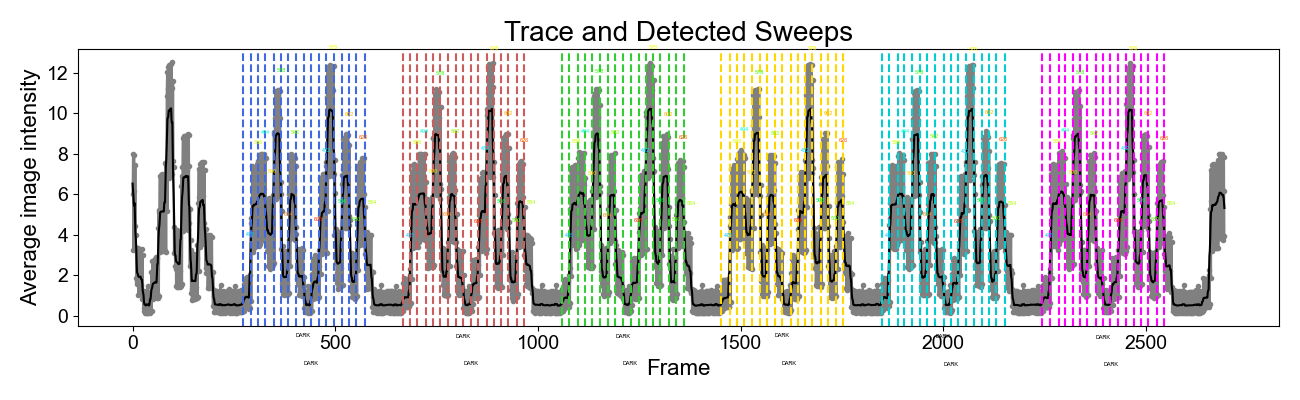

In [4]:
## WHITE

EdgePosWhite = HySE.FindHypercube(vidPathWhite, Wavelengths_list, PlotGradient=False, CropImDimensions=CropImDimensions, DarkMin=50, PlateauSize=17, 
                                  MaxPlateauSize=30, PeakHeight=0.035, ReturnPeaks=False, PeakDistance=15, WindowLength=6)

In [5]:
## Get the data for the selected sweep

Nsweep = 3
DataSweep = HySE.GetSweepData_FromPath(vidPath, EdgePos, Nsweep, CropImDimensions=CropImDimensions)

Cropping Image
Cropping image: x [166 : 680],y [42, 520]


Buffer of frames to ignore between neighbouring wavelenghts set to 12
Cropping image: x [166 : 680],y [42, 520]
Cropping Image
Cropping image: x [166 : 680],y [42, 520]
Computing hypercube: Averaging 6 frames
Computing hypercube: Averaging 6 frames
Computing hypercube: Averaging 6 frames
Computing hypercube: Averaging 9 frames
Computing hypercube: Averaging 6 frames
Computing hypercube: Averaging 6 frames


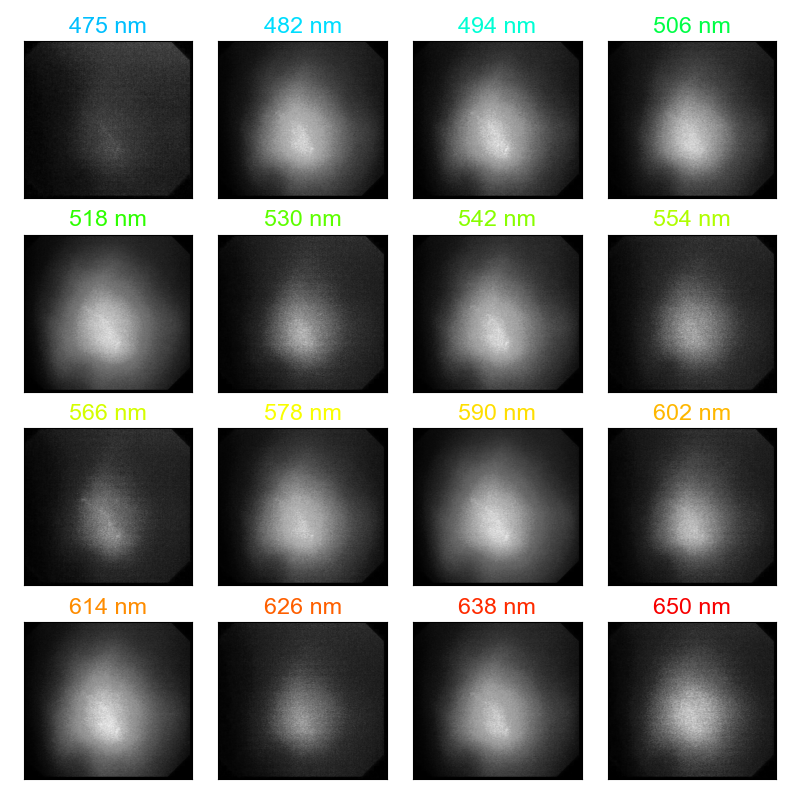

In [10]:
## Get the hypercube for the white reference

HypercubeWhite, _ = HySE.ComputeHypercube(vidPathWhite, EdgePosWhite, Wavelengths_list, BufferSize=12, CropImDimensions=CropImDimensions)

In [7]:
## Get Dark
Dark = HySE.GetDark(vidPath, EdgePos, CropImDimensions=CropImDimensions, Buffer=6, SaveDark=False)

Cropping Image
Cropping image: x [166 : 680],y [42, 520]
Buffer set to 6.
Assuming DarkRepeat = 3,
SaveDark set to False.
min = 0.00, max = 11.00, avg = 0.52, std = 0.96
min = 0.00, max = 11.00, avg = 0.52, std = 0.96
min = 0.00, max = 11.00, avg = 0.52, std = 0.95
min = 0.00, max = 11.00, avg = 0.52, std = 0.96
min = 0.00, max = 11.00, avg = 0.53, std = 0.97
min = 0.00, max = 12.00, avg = 0.52, std = 0.96


In [11]:
## Now attempt co-registration and normalisation

HypercubeN = HySE.SweepCoRegister_WithNormalisation(DataSweep, HypercubeWhite, Dark, Wavelengths_list, Buffer=6, 
                                                    ImStatic_Plateau=1, ImStatic_Index=7, SaveHypercube=False)

PlotDiff has been set to True. Indicate a SavingPath.
MinIndex = 18, MinIndex-Buffer = 12
Plot_Index outside default range. Set to 9, please set manually with Plot_Index
SaveHypercube set to False
Static image: plateau 1, index 7. Use ImStatic_Plateau and ImStatic_Index to change it.
Buffer set to 6

 Plot_PlateauList = [5], Plot_Index = 9



RuntimeError: Exception thrown in SimpleITK ElastixImageFilter_Execute: /Users/francesco/SimpleElastix/Code/Elastix/src/sitkElastixImageFilterImpl.cxx:259:
sitk::ERROR: 
itk::ExceptionObject (0x6000023912a0)
Location: "unknown" 
File: /Users/francesco/SimpleElastix/build/Elastix/Core/Main/elxElastixFilter.hxx
Line: 250
Description: ITK ERROR: ElastixFilter(0x12f7dd2a0): Internal elastix error: See elastix log (use LogToConsoleOn() or LogToFileOn()).



In [9]:
HypercubeWhite.shape

AttributeError: 'tuple' object has no attribute 'shape'